In [6]:
%pip install diffusers

Note: you may need to restart the kernel to use updated packages.


In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

Loaded scheduler as CMStochasticIterativeScheduler from `scheduler` subfolder of openai/diffusers-cd_imagenet64_l2.
{'num_train_timesteps', 'dropout'} was not found in config. Values will be initialized to default values.
All model checkpoint weights were used when initializing UNet2DModel.

All the weights of UNet2DModel were initialized from the model checkpoint at /home/esteb/.cache/huggingface/hub/models--openai--diffusers-cd_imagenet64_l2/snapshots/5f462e4403fc37b72ec6004e806c71805db22387/unet.
If your task is similar to the task the model of the checkpoint was trained on, you can already use UNet2DModel for predictions without further training.
Loaded unet as UNet2DModel from `unet` subfolder of openai/diffusers-cd_imagenet64_l2.
Both `num_inference_steps`: 1 and `timesteps`: [0] are supplied; `timesteps` will be used over `num_inference_steps`.


  0%|          | 0/1 [00:00<?, ?it/s]

sample_variance tensor(80., device='cuda:0', dtype=torch.float16)
scaled_sample_variance tensor(1., device='cuda:0', dtype=torch.float16)
model_output_variance tensor(1.1387, device='cuda:0', dtype=torch.float16)
model_output_min_max tensor(-1.9658, device='cuda:0', dtype=torch.float16) tensor(2.0117, device='cuda:0', dtype=torch.float16)
image [<PIL.Image.Image image mode=RGB size=64x64 at 0x7FA4400FEA50>]


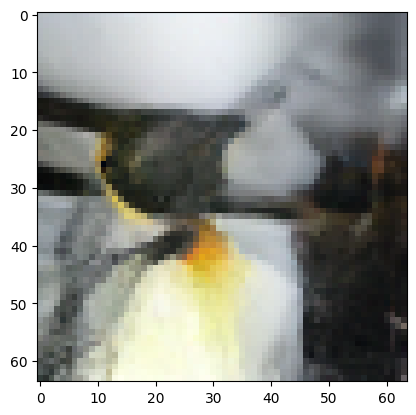

In [9]:
import torch
import diffusers
diffusers.logging.set_verbosity_info()
from diffusers.pipelines.consistency_models.pipeline_consistency_models import ConsistencyModelPipeline
from matplotlib import pyplot as plt

device = "cuda"
# Load the cd_imagenet64_l2 checkpoint.
model_id_or_path = "openai/diffusers-cd_imagenet64_l2"
pipe = ConsistencyModelPipeline.from_pretrained(model_id_or_path, torch_dtype=torch.float16)

pipe.to(device)

# Onestep Sampling
class_id = torch.tensor(145, dtype=torch.long)
output= pipe.__call__(timesteps=[0], class_labels=class_id)
image = output.images[0]
plt.imshow(image)


# Onestep sampling, class-conditional image generation
# ImageNet-64 class label 145 corresponds to king penguins

# class_id = torch.tensor(145, dtype=torch.long)

# image = pipe(num_inference_steps=1, class_labels=class_id).images[0]
# image.save("consistency_model_onestep_sample_penguin.png")

# # Multistep sampling, class-conditional image generation
# # Timesteps can be explicitly specified; the particular timesteps below are from the original Github repo.
# # https://github.com/openai/consistency_models/blob/main/scripts/launch.sh#L77
# image = pipe(timesteps=[22, 0], class_labels=class_id).images[0]
# image.save("consistency_model_multistep_sample_penguin.png")